# example3_3 条间关联事件

## 说明 
### 目的

 - 1. 学习如何处理相邻条的关联事件；

 - 2. 学习TCutG的用法；

 - 3. 利用TGraph fit拟合两参数关联关系；
 
### 相邻条关联（cross-talk）
- 入射粒子入射到两条之间的缝隙，载流子被相邻两条收集；

- 某一条上有很大的能量沉积，导致相邻条产生感应信号；

- 相邻条之间的信号关联关系与粒子的入射位置，以及入射深度都有关系，如下图(入射粒子沉积能量相同)所示；

   - 相邻条的关联在低能入射粒子（如alpha放射源），注入到浅层(BCDEF)时尤为复杂。如在BF位置，两侧产生的的脉冲信号一正一负；
   - 当入射粒子(高能)穿过DSSD时(AHG)两侧信号都是正的。
   
- 一般情况下ADC只接受正脉冲信号,因此只能看见(AHG)范围内的关联，即$E = E_{i} + E_{i+1}$;
  
  ![avatar](./crosstalk.png)
  
### 数据
 - S4的Ring一侧，条宽很窄、条间距很小，因此相邻条之间具有显著的关联。
 - 在pie条中这种关联相对不明显

## 实验数据实际操作

### 打开s4dith.toot并继承tree结构

In [1]:
TFile * ipf = new TFile("../s4dith.root","read");
TTree * tree = (TTree*)ipf->Get("tree");
TCanvas * c1= new TCanvas;

### Ring的第13条与相邻条的共享

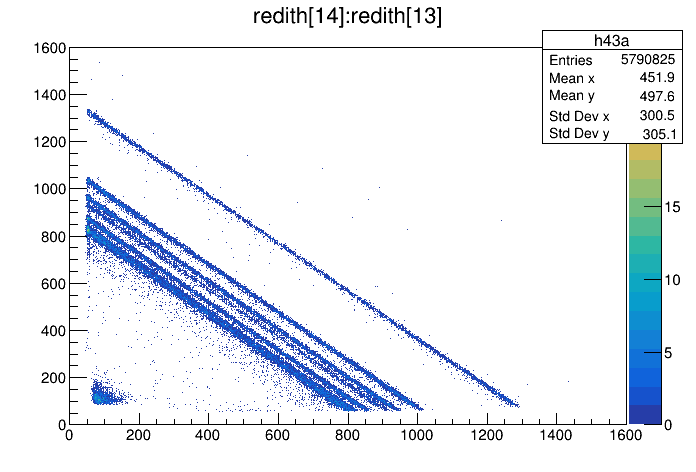

In [2]:
tree->Draw("redith[14]:redith[13]>>h43a(800,0,1600,800,0,1600)","","colz");
c1->Draw();

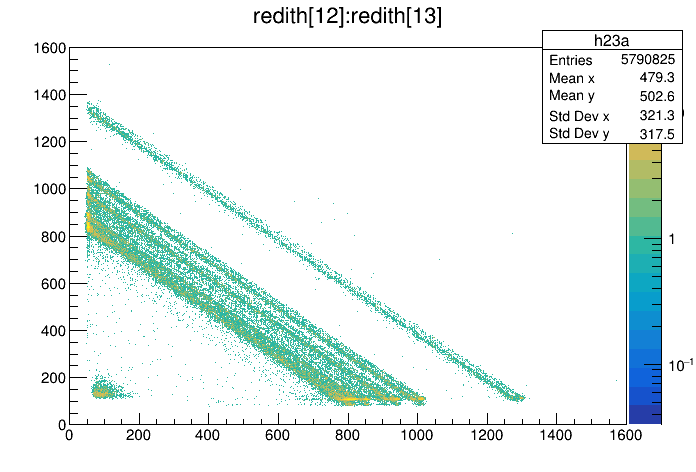

In [3]:
tree->Draw("redith[12]:redith[13]>>h23a(800,0,1600,800,0,1600)","","colz");
gPad->SetLogz();
c1->Draw();

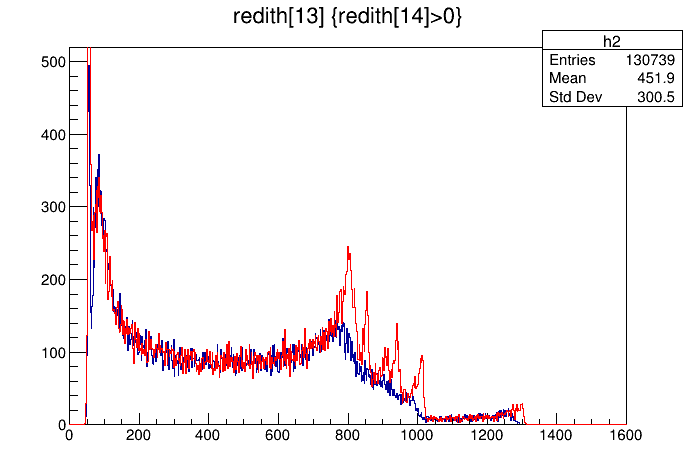

In [4]:
tree->Draw("redith[13]>>h1(800,0,1600)","redith[12]>0");
TH1F *h1=(TH1F*)gROOT->FindObject("h1");
tree->Draw("redith[13]>>h2(800,0,1600)","redith[14]>0");
h1->SetLineColor(kRed);
h1->Draw("same");
c1->Draw();

**说明**
- redith[13](TCut = redith[14]>0),蓝色能谱是连续的，故13条和14条之间能量分配是随机的;
- redith[13](TCut = redith[12]>0),红色能谱有峰结构，故 13条与12条之间，13条有全能量沉积;

### TCutG - 选择图形中的封闭区域作为Cut条件
**手动Cut操作方法**
- 画tree的二维关联图
- 选择Edit->Toolbar
- 在下面出现的图形选项中选择最后一项 ✂️
- 连续点击鼠标左键选择闭合区域，双击结束
- 点击鼠标右键，选择SetName改名称；不改的话缺省为CUTG

  ![avatar](./cut.png)
  
**将Cut结果存储成root文件（代码方法）**
```c++
TFile *fout=new TFile("out.root","recreate"); //创建文件
cut1->Write();//写入cut1
cut2->Write();//写入cut2
```

**存成文件（代码方法）**
```c++
root [0] cut1->SaveAs("cut1.C")
Info in <TCutG::SaveAs>: C++ Macro file: cut1.C has been generated
```

**加载已存储好的cut1.C文件（代码方法）**
```c++
root [1] gROOT->Macro("cut1.C"); //等价于 .x cut1.C
Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1
```

**特别注意：**

在
```c++
tree->Draw("re:pe");
```
图中选在区域存成的cut.C文件，其座标轴变量为
```c++
cutg->SetVarX("pe");
cutg->SetVarY("re");
```
因此，该文件在别的图中使用时，不起作用。
```c++
tree->Draw("re[10]:pe[10]","cut");//cut不会起作用
```
因此，需要修改相应的变量名称：
```c+
cutg->SetVarX("pe[10]");
 cutg->SetVarY("re[10]");
 ```
 才能使用。
 
 **代码内使用TCutG**
 ```c++
//载入TCutG
gROOT->Macro("cut1.C");//gROOT->ProcessLine(".x cut1.C");
//获得TCutG的pointer "cut1"为SetName时指定的name
TCutG *cutg1 = (TCutG *)gROOT->GetListOfSpecials()->FindObject("cut1");
TCutG *cutg2 = (TCutG *)gROOT->GetListOfSpecials()->FindObject("cut2");
...

//判断点(x,y)是否在TCutG以内，    
bool bcut=cutg1->IsInside(Double_t x,Double_t y);//1-is inside, 0- not inside
if(bcut) {
 ...
}
```

### cut并查看cut.C文件
- cut1.C: 对应alpha谱中  8.6931  MeV
- cut2.C: 对应alpha谱中  6.6708  MeV

In [5]:
!cat cut1.C cut2.C

{
//========= Macro generated from object: CUTG/Graph
//========= by ROOT version6.16/00
   
   TCutG *cutg = new TCutG("CUTG",6);
   cutg->SetVarX("redith[13]");
   cutg->SetVarY("redith[14]");
   cutg->SetTitle("Graph");
   cutg->SetFillStyle(1000);
   cutg->SetPoint(0,52.3462,1369.43);
   cutg->SetPoint(1,36.7049,1304.84);
   cutg->SetPoint(2,1269.24,69.1066);
   cutg->SetPoint(3,1306.78,79.8708);
   cutg->SetPoint(4,640.459,770.936);
   cutg->SetPoint(5,52.3462,1369.43);
   cutg->Draw("");
}
{
//========= Macro generated from object: CUTG/Graph
//========= by ROOT version6.16/00
   
   cutg = new TCutG("CUTG",6);
   cutg->SetVarX("redith[13]");
   cutg->SetVarY("redith[14]");
   cutg->SetTitle("Graph");
   cutg->SetFillStyle(1000);
   cutg->SetPoint(0,48.1752,1070.18);
   cutg->SetPoint(1,39.8331,1018.51);
   cutg->SetPoint(2,1003.34,47.578);
   cutg->SetPoint(3,1026.28,71.2594);
   cutg->SetPoint(4,500.73,603.014);
   cutg->SetPoint(5,48.1752,1070.18);
   cutg->Draw("");
}



### 载入多个TCutG文件
- 由于root在加载TCutG对象时，默认命名为cutg，所以多次载入TCutG文件会因为重名而报错；
- 正确的做法是将多个TCutG文件合并为一个并作适当修改;

 **合并**

In [6]:
!rm allcut.C
!cat cut1.C>>allcut.C
!cat cut2.C>>allcut.C
!cat allcut.C

{
//========= Macro generated from object: CUTG/Graph
//========= by ROOT version6.16/00
   
   TCutG *cutg = new TCutG("CUTG",6);
   cutg->SetVarX("redith[13]");
   cutg->SetVarY("redith[14]");
   cutg->SetTitle("Graph");
   cutg->SetFillStyle(1000);
   cutg->SetPoint(0,52.3462,1369.43);
   cutg->SetPoint(1,36.7049,1304.84);
   cutg->SetPoint(2,1269.24,69.1066);
   cutg->SetPoint(3,1306.78,79.8708);
   cutg->SetPoint(4,640.459,770.936);
   cutg->SetPoint(5,52.3462,1369.43);
   cutg->Draw("");
}
{
//========= Macro generated from object: CUTG/Graph
//========= by ROOT version6.16/00
   
   cutg = new TCutG("CUTG",6);
   cutg->SetVarX("redith[13]");
   cutg->SetVarY("redith[14]");
   cutg->SetTitle("Graph");
   cutg->SetFillStyle(1000);
   cutg->SetPoint(0,48.1752,1070.18);
   cutg->SetPoint(1,39.8331,1018.51);
   cutg->SetPoint(2,1003.34,47.578);
   cutg->SetPoint(3,1026.28,71.2594);
   cutg->SetPoint(4,500.73,603.014);
   cutg->SetPoint(5,48.1752,1070.18);
   cutg->Draw("");
}



**修改后**

In [7]:
!cat allcut1.C

{
//========= Macro generated from object: CUTG/Graph
//========= by ROOT version6.16/00
   
   TCutG *cutg = new TCutG("cut1",6);//*****修改cut的名字*****
   cutg->SetVarX("redith[13]");
   cutg->SetVarY("redith[14]");
   cutg->SetTitle("Graph");
   cutg->SetFillStyle(1000);
   cutg->SetPoint(0,52.3462,1369.43);
   cutg->SetPoint(1,36.7049,1304.84);
   cutg->SetPoint(2,1269.24,69.1066);
   cutg->SetPoint(3,1306.78,79.8708);
   cutg->SetPoint(4,640.459,770.936);
   cutg->SetPoint(5,52.3462,1369.43);
   //cutg->Draw("");*****注释此行*****
//}*****注释此行*****
//{*****注释此行*****
//========= Macro generated from object: CUTG/Graph
//========= by ROOT version6.16/00
   
   cutg = new TCutG("cut2",6);//*****修改cut的名字*****
   cutg->SetVarX("redith[13]");
   cutg->SetVarY("redith[14]");
   cutg->SetTitle("Graph");
   cutg->SetFillStyle(1000);
   cutg->SetPoint(0,48.1752,1070.18);
   cutg->SetPoint(1,39.8331,1018.51);
   cutg->SetPoint(2,1003.34,47.578);
   cutg->SetPoint(3,1026.28,71.2594);
   cutg->SetPoi

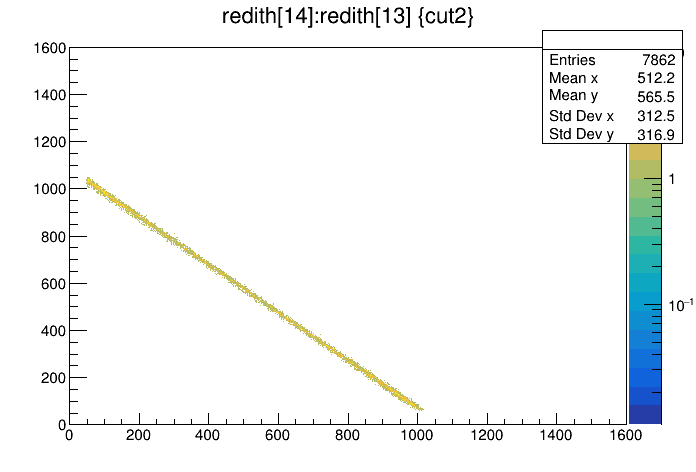

In [8]:
gROOT->Macro("allcut1.C");
c1->Clear();
tree->Draw("redith[14]:redith[13]>>(800,0,1600,800,0,1600)","cut2","colz");
c1->Draw();

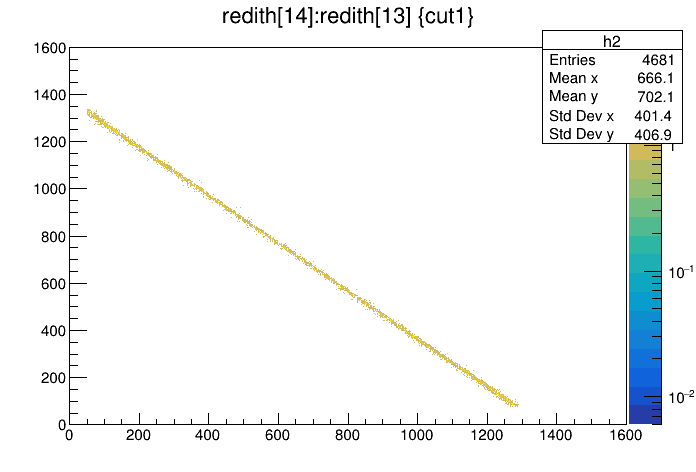

In [9]:
tree->Draw("redith[14]:redith[13]>>h2(800,0,1600,800,0,1600)","cut1","colz");
c1->Draw();

### 相邻条修正公式
$x$条能量-道址x的关系：$$e_{x} = k_{x}x + b_{x}$$
$y$条能量-道址x的关系：$$e_{y} = k_{y}y + b_{y}$$
$x$条和$y$条能量和：$$e = e_{x} + e_{y} = k_{x}x + k_{y}y + b_{x} + b_{y}$$
$x$条和$y$条能量关联：$$y = kx + b$$
以上二式联立有：$$k = - \frac{k_{x}}{k_{y}}$$
$$b = \frac{e - b_{x} - b_{y}}{k_{y}}$$

- 从相邻的关联（y-x)拟合得到斜率$k$和截距$b$;
- 由两个能量值($E_{1}, E_{2}$)对应的($b_{1}, b_{2}$)，可得$k_{y}$和($b_{x} + b_{y}$)；
- 从$k$得到$k_{x}$；
- 需要其他约束才能分别确定$b_{x}$和$ b_{y}$;

In [10]:
TGraph * gr;
TF1 * fp1;

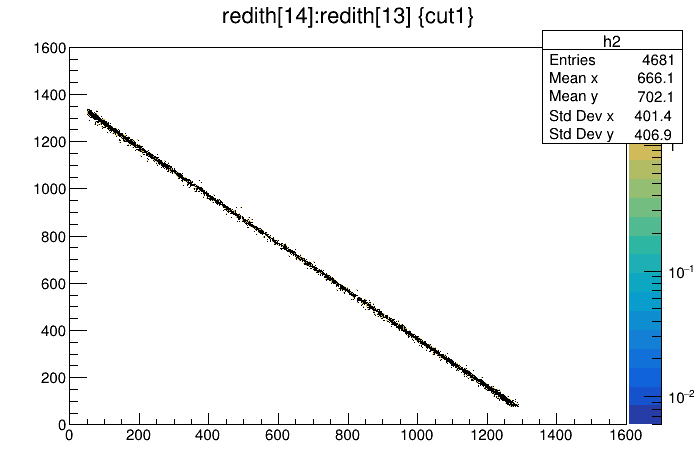

In [11]:
// fill selected tree data to a graph,
// refers to https://root.cern.ch/root/roottalk/roottalk03/0638.html
gr = new TGraph(tree->GetSelectedRows(),tree->GetV2(), tree->GetV1());
gr->Draw("p");//draw point
c1->Draw();

### 拟合得到$k, b$

- 下面为利用cut1条件的拟合


****************************************
Minimizer is Linear
Chi2                      =       230910
NDf                       =         4679
p0                        =      1377.13   +/-   0.198913    
p1                        =     -1.01342   +/-   0.000255772 


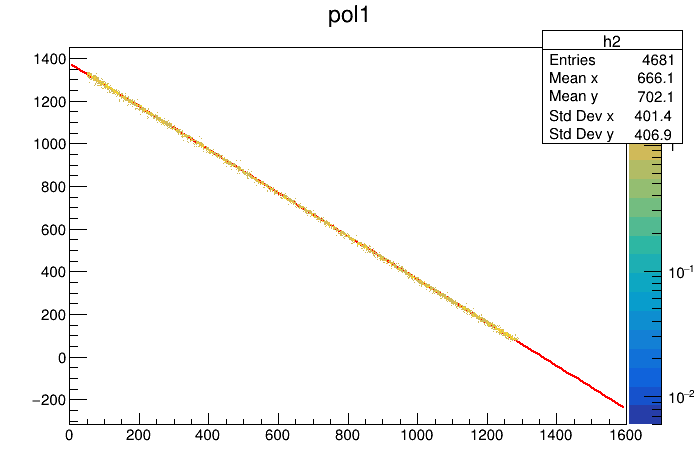

In [12]:
fp1= new TF1("fp1","pol1",0,1600);
fp1->SetLineColor(kRed);
gr->Fit(fp1);
fp1->Draw();
h2->Draw("same colz");
c1->Draw();

In [13]:
Double_t p0;
Double_t p1;
TString stree;

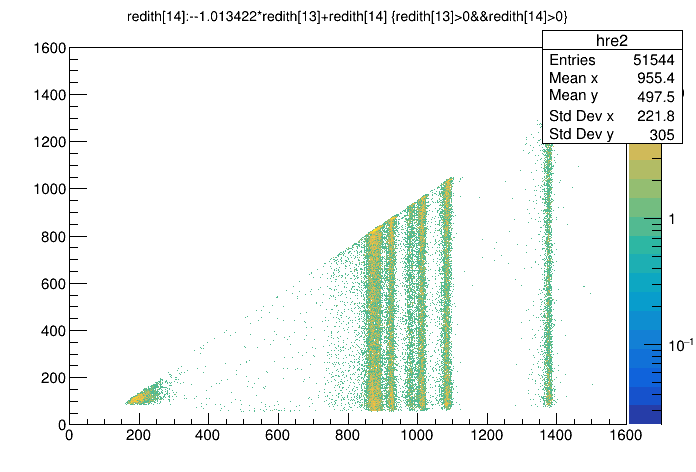

In [14]:
p0=fp1->GetParameter(0);
p1=fp1->GetParameter(1);
stree.Form("redith[14]:-%f*redith[13]+redith[14]>>hre2(800,0,1600,800,0,1600)",p1);
tree->Draw(stree.Data(),"redith[13]>0&&redith[14]>0","colz");
c1->Draw();

### 相邻条能量之和

In [15]:
TH1F *hre=(TH1F*)hre2->ProjectionX();
hre->SetName("hre");
TH1F *h13=new TH1F("h13","h13",800,0,1600);
TH1F *h14=new TH1F("h14","h14",800,0,1600);
tree->Draw("redith[13]>>h13");
tree->Draw("redith[14]>>h14");
h13->SetLineColor(kGreen);
h14->SetLineColor(kBlue);
hre->SetLineColor(kRed);

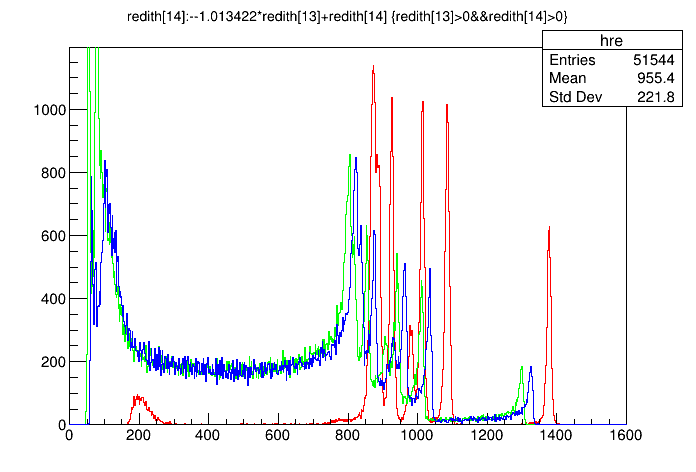

In [16]:
hre->Draw();
h13->Draw("same");
h14->Draw("same");
c1->Draw();

- 利用cut1和cut2下相邻条关联图，计算刻度系数，计算事件的能量:  $e = e_{x} + e_{y} = k_{x}x + k_{y}y + b_{x} + b_{y}$

### 在判断相邻条相加后事件所属的位置时
- 直接指定为能量更大的一侧的位置
- 也可以按照能量权重计算更精确的位置
$$x_{w} = \frac{e_{1}x_{1} + e_{2}x_{2}}{e_{1} + e_{2}}$$

In [18]:
!jupyter nbconvert example3_3.ipynb --to html

[NbConvertApp] Converting notebook example3_3.ipynb to html


